<a href="https://colab.research.google.com/github/eacb93-coder/adm/blob/main/Sistema_de_Auditoria_de_Vota%C3%A7%C3%A3o_Corporativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Processando 'votos.txt'... ---

         RELATÓRIO DE AUDITORIA         
Candidato 1     |  5 votos ⬅ LÍDER
Candidato 2     |  3 votos 
Candidato 3     |  3 votos 
Candidato 4     |  3 votos 
Nulos           |  4 votos 
Brancos         |  2 votos 
----------------------------------------
🏆 VENCEDOR DEFINIDO: Candidato 1
----------------------------------------

Gerando gráfico visual...



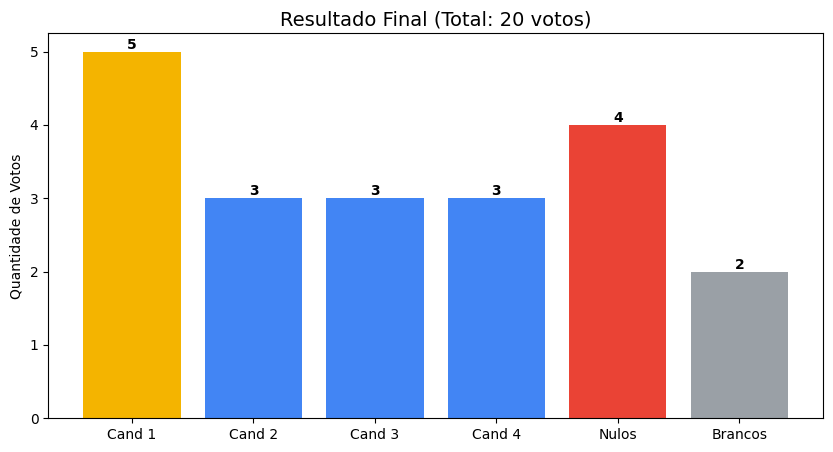

In [23]:
import matplotlib.pyplot as plt

def sistema_eleitoral_completo():
    """
    Sistema Híbrido: Realiza auditoria contábil (Texto) e gera Dashboard (Gráfico).
    """

    apuracao = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    total_lidos = 0
    nome_arquivo = "votos.txt"

    print(f"--- Processando '{nome_arquivo}'... ---\n")

    try:
        with open(nome_arquivo, "r", encoding="utf-8") as arquivo:
            for i, linha in enumerate(arquivo, start=1):
                linha_limpa = linha.strip()
                if not linha_limpa: continue

                try:
                    voto = int(linha_limpa)
                    if voto in apuracao:
                        apuracao[voto] += 1
                        total_lidos += 1
                    else:
                        apuracao[5] += 1
                        total_lidos += 1
                except ValueError:
                    pass

    except FileNotFoundError:
        print("Erro: Arquivo não encontrado."); return

    if total_lidos == 0: print("Arquivo vazio."); return

    candidatos = {k: v for k, v in apuracao.items() if k <= 4}
    maior_voto = max(candidatos.values())

    vencedores = [k for k, v in candidatos.items() if v == maior_voto]

    perc_nulos = (apuracao[5] / total_lidos) * 100
    perc_brancos = (apuracao[6] / total_lidos) * 100

    print("="*40)
    print(f"{'RELATÓRIO DE AUDITORIA':^40}")
    print("="*40)

    for codigo, total in apuracao.items():
        if codigo <= 4: label = f"Candidato {codigo}"
        elif codigo == 5: label = "Nulos"
        else: label = "Brancos"

        marcador = "⬅ LÍDER" if codigo in vencedores else ""
        print(f"{label:<15} | {total:>2} votos {marcador}")

    print("-" * 40)

    if len(vencedores) > 1:
        lista_str = ", ".join(str(c) for c in vencedores)
        print(f"⚠ ALERTA DE EMPATE: Candidatos {lista_str}")
    else:
        print(f"🏆 VENCEDOR DEFINIDO: Candidato {vencedores[0]}")
    print("-" * 40)
    print("\nGerando gráfico visual...\n")

    labels_grafico = ['Cand 1', 'Cand 2', 'Cand 3', 'Cand 4', 'Nulos', 'Brancos']
    valores_grafico = [apuracao[1], apuracao[2], apuracao[3], apuracao[4], apuracao[5], apuracao[6]]

    cores = []
    for cod in range(1, 7):
        if cod in vencedores:
            cores.append('#F4B400')
        elif cod == 5:
            cores.append('#EA4335')
        elif cod == 6:
            cores.append('#9AA0A6')
        else:
            cores.append('#4285F4')

    plt.figure(figsize=(10, 5))
    barras = plt.bar(labels_grafico, valores_grafico, color=cores)

    plt.title(f'Resultado Final (Total: {total_lidos} votos)', fontsize=14)
    plt.ylabel('Quantidade de Votos')

    for barra in barras:
        altura = barra.get_height()
        if altura > 0:
            plt.text(barra.get_x() + barra.get_width()/2., altura,
                     f'{int(altura)}', ha='center', va='bottom', fontweight='bold')

    plt.show()

if __name__ == "__main__":
    sistema_eleitoral_completo()